First few rows of the dataset:
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

Summary Statistics:
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

Correlation Matrix:
          AT         V        AP        RH      

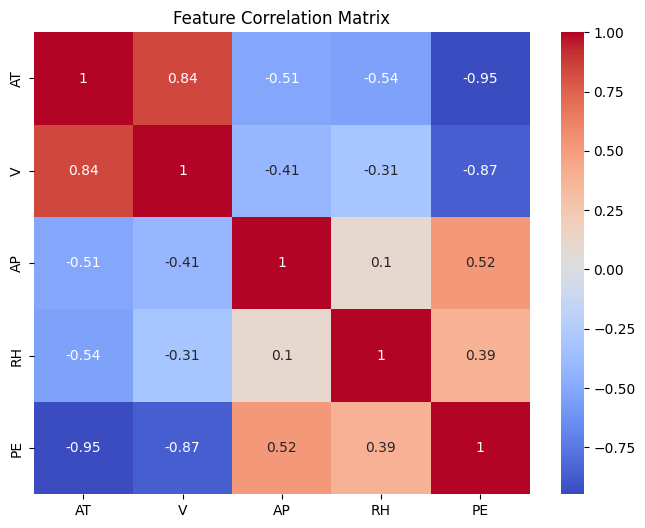

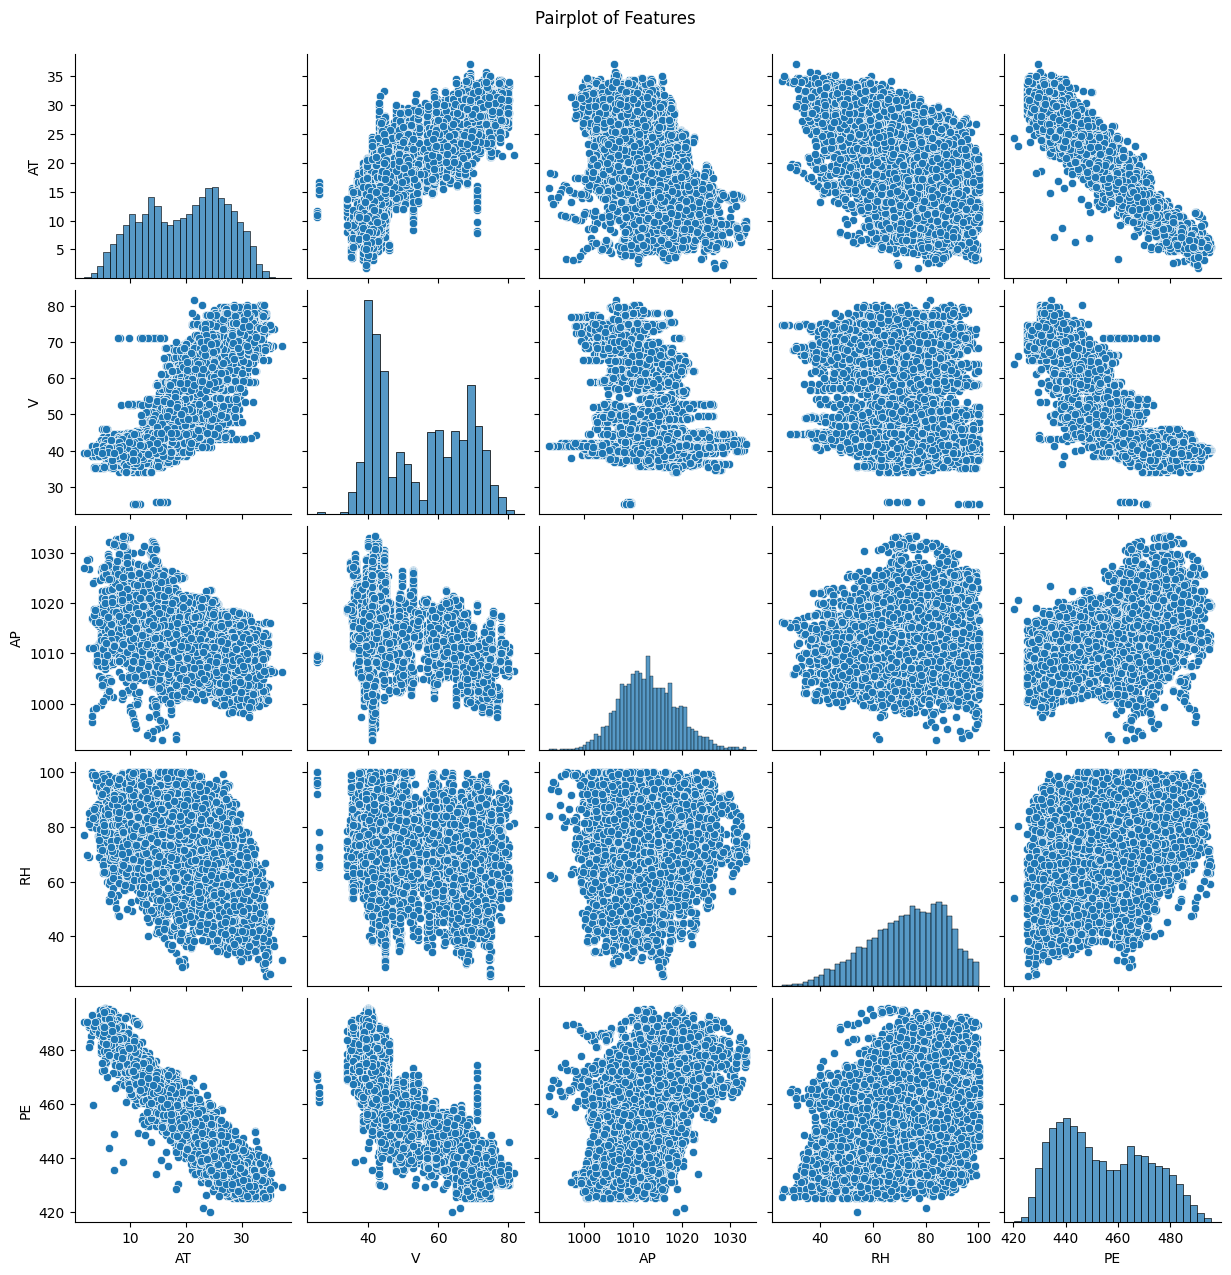


Cross-validation scores for Linear Regression:
Linear Regression RMSE (Cross-Validation): 4.572397273712407

Linear Regression Performance on Test Set:
MAE: 3.595913178273408
RMSE: 4.502633229532186
R2 Score: 0.9301046431962188

Cross-validation scores for Random Forest:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest RMSE (Cross-Validation): 3.4617887882106713


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-7-0f0578669cb2>:104: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')



Random Forest Performance on Test Set:
MAE: 2.329049895506788
RMSE: 3.2458512770331125
R2 Score: 0.9636777774021675

Model Comparison:
Linear Regression - RMSE: 4.502633229532186 R2 Score: 0.9301046431962188
Random Forest - RMSE: 3.2458512770331125 R2 Score: 0.9636777774021675

Selected Model: Random Forest


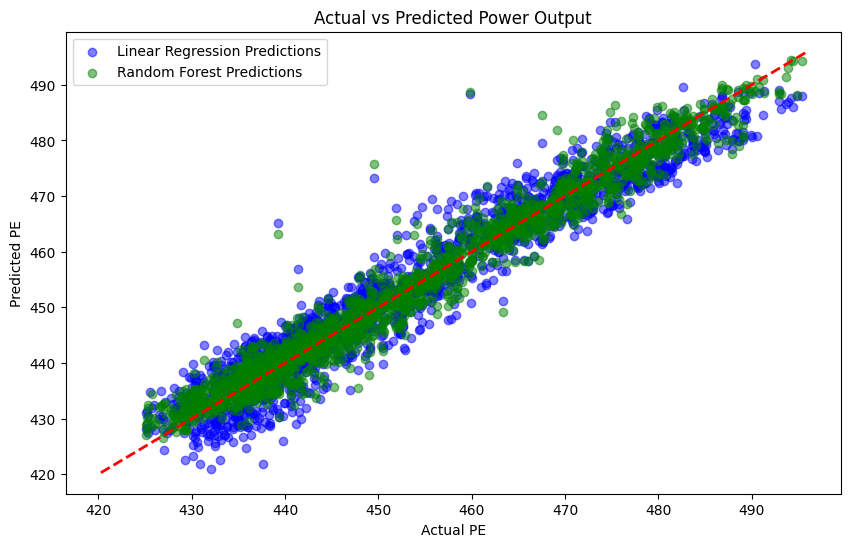

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/content/CCPP_data (1).csv')  # replace with your actual file path

# Display the first few rows of the data to understand its structure
print("First few rows of the dataset:")
print(data.head())

# Step 1: Data Exploration and Visualization
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = data.corr()
print(correlation_matrix)

# Heatmap for correlation visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Pairplot to visually inspect relationships
sns.pairplot(data)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Step 2: Define Features and Target Variable
X = data[['AT', 'V', 'AP', 'RH']]  # Independent variables
y = data['PE']                      # Target variable

# Step 3: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Selection and Training
# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Cross-validation for Linear Regression
print("\nCross-validation scores for Linear Regression:")
lr_scores = cross_val_score(lr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lr_rmse_scores = np.sqrt(-lr_scores)
print("Linear Regression RMSE (Cross-Validation):", lr_rmse_scores.mean())

# Train Linear Regression Model
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate Linear Regression Model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_r2 = r2_score(y_test, lr_predictions)

print("\nLinear Regression Performance on Test Set:")
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)
print("R2 Score:", lr_r2)

# Cross-validation for Random Forest
print("\nCross-validation scores for Random Forest:")
rf_scores = cross_val_score(rf_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rf_rmse_scores = np.sqrt(-rf_scores)
print("Random Forest RMSE (Cross-Validation):", rf_rmse_scores.mean())

# Train Random Forest Model
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest Model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)

print("\nRandom Forest Performance on Test Set:")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R2 Score:", rf_r2)

# Step 5: Model Comparison
print("\nModel Comparison:")
print("Linear Regression - RMSE:", lr_rmse, "R2 Score:", lr_r2)
print("Random Forest - RMSE:", rf_rmse, "R2 Score:", rf_r2)

# Select the model with the best RMSE and R2 score
best_model = rf_model if rf_rmse < lr_rmse else lr_model
print("\nSelected Model:", "Random Forest" if best_model == rf_model else "Linear Regression")

# Step 6: Visualize Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, color='blue', alpha=0.5, label='Linear Regression Predictions')
plt.scatter(y_test, rf_predictions, color='green', alpha=0.5, label='Random Forest Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")
plt.title("Actual vs Predicted Power Output")
plt.legend()
plt.show()
